In [2]:
import numpy as np
import pandas as pd
import math as m
import sympy as sym
import random as rand
import matplotlib.pyplot as plt
import cmath as cm
from IPython.display import display, Latex



In [3]:
# defininf the states
# defininsg coefficeients sybols

def Creating_states( coeff = [1/(2**.5),1/(2**.5),1/(2**.5),1/(2**.5)] , Abstract = False):    # coeff list like [a0,a1,b0,b1]
    if Abstract == True:
        a0 = sym.symbols('a0')
        a1 = sym.symbols('a1')
        b0 = sym.symbols('b0')
        b1 = sym.symbols('b1')
    else:
        a0 = coeff[0]
        a1 = coeff[1]
        b0 = coeff[2]
        b1 = coeff[3]
    psi0 = [a0,a1]      # defining states
    psi1 = [b0,b1]
    return([psi0,psi1])

In [4]:
initial_states = Creating_states(Abstract=False, coeff = [1/(2**.5),1/(2**.5),1,0])     # Creating the two states with these coefficients

psi0 = initial_states[0]
psi1 = initial_states[1]

psi0

[0.7071067811865475, 0.7071067811865475]

In [5]:
psi0sq = []
psi1sq = []
[[psi0sq.append(i*j) for i in psi0] for j in psi0]
[[psi1sq.append(i*j) for i in psi1] for j in psi1]   # creating list of coeff for squared states (intermeditate step)

psi0psi0 = [psi0sq[0], (psi0sq[1]**2+psi0sq[2]**2)**(.5), psi0sq[3]]        # the second element is the normalized coefficient due to the addition of states (01+10). See OneNote writeup for details
psi1psi1 = [psi1sq[0], (psi1sq[1]**(2)+psi1sq[2]**(2))**(.5), psi1sq[3]]            # symmetric states in basis (|00>, normalized version of (|01>+|10>),|11>)

# psi0psi0
# sum([i**2 for i in psi0psi0])   # adding to 1 now.

In [6]:
#creating the density matrix rho
# rho is 1/2*(|psi0psi0Xpsi0psi0|+|psi1psi1Xpsi1psi1|)
# findiing the conjugate vectors 

vec_psi0psi0 = np.array(psi0psi0)     # convertying to numpy arrays
vec_psi1psi1 = np.array(psi1psi1)

rho = (1/2)*(np.outer(vec_psi0psi0, vec_psi0psi0)+np.outer(vec_psi1psi1, vec_psi1psi1))       # density matrix with priors 1/2 each.

rho

array([[0.625    , 0.1767767, 0.125    ],
       [0.1767767, 0.25     , 0.1767767],
       [0.125    , 0.1767767, 0.125    ]])

In [7]:
# creating the SIC POVM matrices
w = m.e**((2/3)*m.pi*(1j))
POVM_vec = (1/(2**.5))*(np.array([[0,1,-1],[-1,0,1],[1,-1,0],[0,w,-w**2],[-1,0,w**2],[1,-w,0],[0,w**2,-w],[-1,0,w],[1,-w**2,0]]))  # an array of POVM direction vectors
POVM_elts = [(1/3)*np.outer(np.conjugate(POVM_vec[i]),POVM_vec[i]) for i in range(len(POVM_vec))]   # a list of POVM matrices

sum([np.trace(POVM_elts[i]) for i in range(9)])  # trace sum checks out NOPE !!!!!    
# POVM_elts[0]

(2.999999999999999+1.0928192876985672e-17j)

In [8]:
# prob_vec = [(POVM_elts[i]*rho).trace() for i in range(len(POVM_elts))]
prob_vec =  [np.trace(np.dot(POVM_elts[i],rho)) for i in range(9)] #[(POVM_elts[i]*rho).trace() for i in range(len(POVM_elts))]
prob_vec = [i.real for i in prob_vec if abs(i.imag) < .01]          # cleaned up the trailing imaginary parts

# sum(prob_vec)        # prob not adding to 1?
# print(prob_vec)



In [9]:
N = 10000       # number of measurements  

POVM_dir_symbols = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']       # symbols to indicate collapsed direction
#prob distribution is simply the corresponding elements of the prob_vec
collapse_dir_vec = rand.choices(POVM_dir_symbols, weights=prob_vec, k = N)   # choosing collapse directions with weights for N trials

nj_vec = [collapse_dir_vec.count(f'd{i+1}') for i in range(9)]
pj_num_vec = [i/N for i in nj_vec]         # working
([i*N for i in prob_vec] , nj_vec)   # comparing the theoretical and experimental collapse probabilities


([35.74434901121032,
  833.3333333333333,
  869.0776823445435,
  919.6278254943937,
  1458.3333333333328,
  1752.961158827727,
  919.6278254943937,
  1458.3333333333326,
  1752.961158827727],
 [34, 864, 801, 936, 1432, 1770, 940, 1481, 1742])

In [10]:
M = [[np.trace(np.dot(POVM_elts[i],POVM_elts[j])) for i in range(len(POVM_elts))] for j in range(len(POVM_elts))]     # creating M matrix using POVM definition



In [11]:
u_0 = [1/3 for i in range(9)]           # cerating u_0 vector, to create the inverse matrix
M_inv = 3*np.outer(u_0,u_0) + 12*(np.eye(9) - np.outer(u_0,u_0))        # creating the inverse matrix
# np.trace(np.dot(M,M_inv))       # gives identity, checks out
r_vec = np.dot(M_inv,pj_num_vec)


In [12]:
rho_num_list = [r_vec[i]*POVM_elts[i] for i in range(len(POVM_elts))]   # list of matrices, see equation 7 in Hillery notes pair_disc.pdf
# [i for i in rho_num_list]

In [13]:
rho_num = np.zeros_like(rho_num_list[0])

# Loop over the matrices and sum them element-wise
for matrix in rho_num_list:
    rho_num = np.add(rho_num, matrix)

rho_num   

array([[0.618 +0.00000000e+00j, 0.191 -4.84974226e-03j,
        0.1185-8.48704896e-03j],
       [0.191 +4.84974226e-03j, 0.2446+3.42989233e-18j,
        0.1808+6.92820323e-04j],
       [0.1185+8.48704896e-03j, 0.1808-6.92820323e-04j,
        0.1374+2.52269733e-18j]])

In [14]:
rho # printing the theoretical density matrix and below the numerically reconstructed one
del_rho = rho_num-rho  # defining the difference of numberical and theoretical state
del_rho

array([[-0.007    +0.00000000e+00j,  0.0142233-4.84974226e-03j,
        -0.0065   -8.48704896e-03j],
       [ 0.0142233+4.84974226e-03j, -0.0054   +3.42989233e-18j,
         0.0040233+6.92820323e-04j],
       [-0.0065   +8.48704896e-03j,  0.0040233-6.92820323e-04j,
         0.0124   +2.52269733e-18j]])

In [15]:
eigenvalues, eigenvectors = np.linalg.eig(del_rho)  # each COLUMN is the corresponding eigenvector and not the row. eigenvectors[:,0]
# eigenvectors[:,0]   # eigenvector correspoding to the first eigenvalue
evals = np.array([i.real for i in eigenvalues if abs(i.imag)< .001])
norm_del_rho = max([abs(i) for i in evals])     # picking out the largest magnitude evalue

# evals   Working till here

In [120]:
#Creating function for the deltarho error

def experiment_rho(N, coeff, priors, show_calcs = False):
    initial_states = Creating_states(Abstract=False, coeff = coeff)     # Creating the two states with these coefficients
    psi0 = initial_states[0]
    psi1 = initial_states[1]    # created the states to be discriminated

    psi0sq = []
    psi1sq = []
    [[psi0sq.append(i*j) for i in psi0] for j in psi0]
    [[psi1sq.append(i*j) for i in psi1] for j in psi1]   
    psi0psi0 = [psi0sq[0], (psi0sq[1]**2+psi0sq[2]**2)**(.5), psi0sq[3]]    
    psi1psi1 = [psi1sq[0], (psi1sq[1]**(2)+psi1sq[2]**(2))**(.5), psi1sq[3]]    # creating square states
    
    vec_psi0psi0 = np.array(psi0psi0)     
    vec_psi1psi1 = np.array(psi1psi1)
    rho = priors[0]*np.outer(vec_psi0psi0, vec_psi0psi0)+ priors[1]*np.outer(vec_psi1psi1, vec_psi1psi1)     # theoretical density matrix with priors 1/2 each.

    prob_vec =  [np.trace(np.dot(POVM_elts[i],rho)) for i in range(9)] 
    prob_vec = [round(i.real, 5) for i in prob_vec if abs(i.imag) < .01]          # cleaned up theoretical prob vector

    POVM_dir_symbols = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']      # symbols to indicate collapsed direction
    #prob distribution is simply the corresponding elements of the prob_vec
    collapse_dir_vec = rand.choices(POVM_dir_symbols, weights=prob_vec, k = N)   # choosing collapse directions with weights for N trials

    nj_vec = [collapse_dir_vec.count(f'd{i+1}') for i in range(9)]
    pj_num_vec = [i/N for i in nj_vec]                                  # numerical prob vector     
    
    r_vec = np.dot(M_inv,pj_num_vec)
    
    # constructing the rho numrical using the r_vector etc.
    rho_num_list = [r_vec[i]*POVM_elts[i] for i in range(len(POVM_elts))]   # list of matrices, see equation 7 in Hillery notes pair_disc.pdf
    rho_num_raw = np.zeros_like(rho_num_list[0])
    for matrix in rho_num_list:
        rho_num_raw = np.add(rho_num_raw, matrix)       # created the numerical rho
    
    rho_num = np.real_if_close(np.around(rho_num_raw, decimals=5))



    del_rho = rho_num-rho 
    
    eigenvalues, eigenvectors = np.linalg.eig(del_rho)  # each COLUMN is the corresponding eigenvector and not the row. eigenvectors[:,0]
    # eigenvectors[:,0]   # eigenvector correspoding to the first eigenvalue
    evals = np.array([i.real for i in eigenvalues if abs(i.imag)< .001])
    norm_del_rho = max([abs(i) for i in evals])     # picking out the largest magnitude evalue
    error = norm_del_rho

    # expression = r'\alpha = 5'
    # latex_code = f'${expression}$'
    # display(Latex(latex_code))


    if show_calcs == True:
        # print('Psi0 and 1 = ',psi0, psi1)
        # print('Psi0Psi0 and 1 = ',psi0psi0, psi1psi1)
        
        # display(Latex(f'${r' put the latex code here '}$'))  # Template for displaying in latex
        latex_psi0 = r'\Psi_0 = {}|0\rangle + {}|1\rangle'.format(psi0[0],psi0[1])
        latex_psi1 = r'\Psi_1 = {}|0\rangle + {}|1\rangle'.format(psi1[0],psi1[1])


        display(Latex(f'${latex_psi0}$'))
        display(Latex(f'${latex_psi1}$'))
        

        
        # display(Latex(f'${r' put the latex code here '}$'))  

        
        print('\n Rho_Theorectical = \n', rho)

        print('\n Prob_theory = ', prob_vec)
        print('Prob_numerical = ', pj_num_vec)

        print('Rho_Numerical_raw = \n', rho_num_raw )
        print('\n Rho_Numerical = \n', rho_num )
        
        print('\nDifference (rho-rho_num) = \n ', del_rho )
        
        print('\n evals and evecs of del_rho= \n ', eigenvalues, eigenvectors)
        
        print('\n largest mod eval (error) =' , error)
    return error


# testing
c= [1,0,0,1]
p = [.5,.5]

experiment_rho(1000, c,p, True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


 Rho_Theorectical = 
 [[0.5 0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0.5]]

 Prob_theory =  [0.08333, 0.16667, 0.08333, 0.08333, 0.16667, 0.08333, 0.08333, 0.16667, 0.08333]
Prob_numerical =  [0.101, 0.161, 0.077, 0.091, 0.145, 0.077, 0.107, 0.168, 0.073]
Rho_Numerical_raw = 
 [[ 0.402+0.00000000e+00j -0.004-6.92820323e-03j -0.009-3.98371686e-02j]
 [-0.004+6.92820323e-03j  0.052-6.86961759e-20j -0.004+2.77128129e-02j]
 [-0.009+3.98371686e-02j -0.004-2.77128129e-02j  0.546+3.91699176e-18j]]

 Rho_Numerical = 
 [[ 0.402+0.j      -0.004-0.00693j -0.009-0.03984j]
 [-0.004+0.00693j  0.052-0.j      -0.004+0.02771j]
 [-0.009+0.03984j -0.004-0.02771j  0.546+0.j     ]]

Difference (rho-rho_num) = 
  [[-0.098+0.j      -0.004-0.00693j -0.009-0.03984j]
 [-0.004+0.00693j  0.052-0.j      -0.004+0.02771j]
 [-0.009+0.03984j -0.004-0.02771j  0.046+0.j     ]]

 evals and evecs of del_rho= 
  [-0.10937435-2.92861597e-19j  0.0271911 +1.17587333e-18j
  0.08218324-1.21587143e-17j] [[ 0.96358491+0.j          0.180

0.10937434570347329

In [18]:
coeff = [1,0,0,1]
priors = [.5,.5]
trials = [1000*(i+1) for i in range(100)]

sqrtN  = [2.6/(i**.5) for i in trials]     # ideal square root shape with a constant multiplied for scaling
errors = [experiment_rho(i,coeff,priors) for i in trials]

plt.plot(trials, errors, label=r'$\Delta \rho $')
plt.plot(trials ,sqrtN, "--", label=r'$\frac{1}{\sqrt{N}}$')
plt.xlabel(' N (trials)')
plt.ylabel(r'$\Delta \rho $')
plt.title(r'$|\psi_0\rangle ={}|0\rangle+{}|1\rangle $, $|\psi_1\rangle ={}|0\rangle+{}|1\rangle $, $p_0={},\,p_1={}$'.format(coeff[0], coeff[1], coeff[2], coeff[3], priors[0], priors[1]))
plt.legend()

plt.show()

NameError: name 'show_cals' is not defined

In [ ]:
# computing the error (fidelity) on the states directly 

eigenvalues, eigenvectors = np.linalg.eig(rho_num) 
evals = np.array([i.real for i in eigenvalues if abs(i.imag)< .001])

# Find the index of the smallest eigenvalue
index = np.argmin(evals)

# Select the corresponding eigenvector
#eigenvector = eigenvectors[:, index]
eigenvector = eigenvectors[index]

# coeffs of csi 
c00=eigenvector[0]
c01=eigenvector[1]
c11=eigenvector[2]

# def eq 5 in Hillery notes
#def quadratic_equation(x, a, b, c):
    #return a * x**2 + b * x + c

# solve eq 5 in Hillery notes
def solve_quadratic(a, b, c):
    d = (b**2) - (4*a*c)
    sol1 = (-b-cm.sqrt(d))/(2*a)
    sol2 = (-b+cm.sqrt(d))/(2*a)
    return sol1, sol2
f0,f1=solve_quadratic(c00, 2*c01, c11)

# find coeff a0,1 and b0,1 for the states
a0 = abs(f0)/(m.sqrt(1+ (abs(f0))**2))
a1 = 1/(m.sqrt(1+ (abs(f0))**2))
b0 = abs(f1)/(m.sqrt(1+ (abs(f1))**2))
b1 = 1/(m.sqrt(1+ (abs(f1))**2))

# numerical states
psi0_num = [a0,a1]
psi1_num = [b0,b1]

# theoretical states
psi0 = [coeff[0],coeff[1]]
psi1 = [coeff[2],coeff[3]]

# fidelity
fid0 = abs(np.dot(psi0_num,psi0))**2
fid1 = abs(np.dot(psi1_num,psi1))**2
print(fid0,fid1)


(-3.16717558878739-0.3225675790340646j) (-0.9178723650463316+0.04945963565236063j)
0.9540406158149364 0.29967733210147385 0.676739062455634 0.7362229562752507
[0.9540406158149364, 0.29967733210147385] [0.676739062455634, 0.7362229562752507]
0.9101934966245431 0.5420242413466697


In [ ]:
#Creating function for the deltarho error

def solve_quadratic(a, b, c):
    d = (b**2) - (4*a*c)
    sol1 = (-b-cm.sqrt(d))/(2*a)
    sol2 = (-b+cm.sqrt(d))/(2*a)
    return sol1, sol2

def experiment_fid(N, coeff, priors):
    initial_states = Creating_states(Abstract=False, coeff = coeff)     # Creating the two states with these coefficients
    psi0 = initial_states[0]
    psi1 = initial_states[1]    # created the states to be discriminated

    psi0sq = []
    psi1sq = []
    [[psi0sq.append(i*j) for i in psi0] for j in psi0]
    [[psi1sq.append(i*j) for i in psi1] for j in psi1]   
    psi0psi0 = [psi0sq[0], (psi0sq[1]**2+psi0sq[2]**2)**(.5), psi0sq[3]]    
    psi1psi1 = [psi1sq[0], (psi1sq[1]**(2)+psi1sq[2]**(2))**(.5), psi1sq[3]]    # creating square states
    
    vec_psi0psi0 = np.array(psi0psi0)     
    vec_psi1psi1 = np.array(psi1psi1)
    rho = priors[0]*np.outer(vec_psi0psi0, vec_psi0psi0)+ priors[1]*np.outer(vec_psi1psi1, vec_psi1psi1)     # theoretical density matrix with priors 1/2 each.

    prob_vec =  [np.trace(np.dot(POVM_elts[i],rho)) for i in range(9)] 
    prob_vec = [i.real for i in prob_vec if abs(i.imag) < .01]          # cleaned up theoretical prob vector

    POVM_dir_symbols = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']      # symbols to indicate collapsed direction
    #prob distribution is simply the corresponding elements of the prob_vec
    collapse_dir_vec = rand.choices(POVM_dir_symbols, weights=prob_vec, k = N)   # choosing collapse directions with weights for N trials

    nj_vec = [collapse_dir_vec.count(f'd{i+1}') for i in range(9)]
    pj_num_vec = [i/N for i in nj_vec]                                  # numerical prob vector     
    
    r_vec = np.dot(M_inv,pj_num_vec)
    
    # constructing the rho numrical using the r_vector etc.
    rho_num_list = [r_vec[i]*POVM_elts[i] for i in range(len(POVM_elts))]   # list of matrices, see equation 7 in Hillery notes pair_disc.pdf
    rho_num = np.zeros_like(rho_num_list[0])
    for matrix in rho_num_list:
        rho_num = np.add(rho_num, matrix)       # created the numerical rho
     
    eigenvalues, eigenvectors = np.linalg.eig(rho_num) 
    evals = np.array([i.real for i in eigenvalues if abs(i.imag)< .001])
    index = np.argmin(evals)
    eigenvector = eigenvectors[index]
    c00=eigenvector[0]
    c01=eigenvector[1]
    c11=eigenvector[2]
    f0,f1=solve_quadratic(c00, 2*c01, c11)
    a0 = abs(f0)/(m.sqrt(1+ (abs(f0))**2))
    a1 = 1/(m.sqrt(1+ (abs(f0))**2))
    b0 = abs(f1)/(m.sqrt(1+ (abs(f1))**2))
    b1 = 1/(m.sqrt(1+ (abs(f1))**2))
    psi0_num = [a0,a1]
    psi1_num = [b0,b1]
    psi0 = [coeff[0],coeff[1]]
    psi1 = [coeff[2],coeff[3]]
    fid0 = abs(np.dot(psi0_num,psi0))**2
    fid1 = abs(np.dot(psi1_num,psi1))**2
    fid = [fid0,fid1]

    return fid

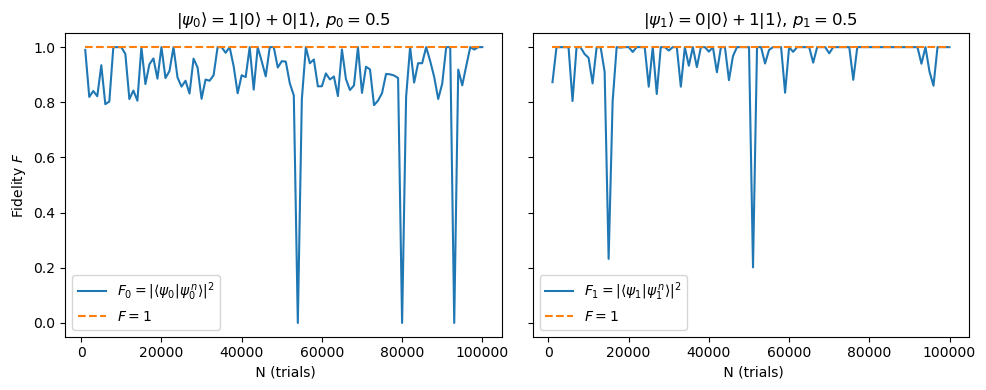

In [ ]:
coeff = [1,0,0,1]
priors = [.5,.5]
trials = [1000*(i+1) for i in range(100)]

pfid  = [1 for i in trials]     # perfect fidelity of 1
error0 = [experiment_fid(i,coeff,priors)[0] for i in trials]
error1 = [experiment_fid(i,coeff,priors)[1] for i in trials]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.plot(trials, error0, label=r'$F_0=|\langle \psi_0|\psi_0^{\,n}\rangle|^2$')
ax1.plot(trials , pfid, "--", label=r'$F=1$')
ax1.set_xlabel(' N (trials)')
ax1.set_ylabel(r'Fidelity $F$')
ax1.set_title(r'$|\psi_0\rangle ={}|0\rangle+{}|1\rangle $, $p_0={}$'.format(coeff[0], coeff[1],priors[0]))
ax1.legend(loc='best')

ax2.plot(trials, error1, label=r'$F_1=|\langle \psi_1|\psi_1^{\,n}\rangle|^2$')
ax2.plot(trials , pfid, "--", label=r'$F=1$')
ax2.set_xlabel(' N (trials)')
ax2.set_title(r'$|\psi_1\rangle ={}|0\rangle+{}|1\rangle $, $p_1={}$'.format(coeff[2], coeff[3], priors[1]))
ax2.legend(loc='best')

fig.tight_layout()
plt.show()